<a href="https://colab.research.google.com/github/Aditya-Tiwari-07/TSF-Data-Science-and-Business-Analytics-Task-1/blob/main/Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression for Supervised ML with Scikit Learn**
In this project we will use Linear Regression to solve a supervised ML problem with Scikit Learn. We need to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple regression task involving 2 variables.

### **Exploring the Data**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
%matplotlib inline

We first download the data from its URL and read it into a dataframe. This dataframe is printed out.

In [2]:
# Reading data from remote link
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

print(data)

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


We'll now plot our data on a 2-D graph to see if we can detect any relationship between the 2 variables.

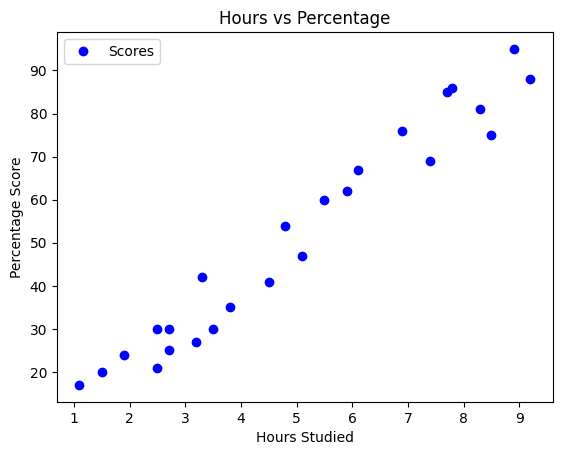

In [3]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o', color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above graph we can clearly see that the two variables have a positive correlation. Next we print some descriptive stats to get a beter feel of the data.

In [4]:
# Some additional stats to get a feel of the data.
descriptive_stats = data.describe()
print(descriptive_stats)

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


### **Training the Linear Regression Model**

We now split our data into "features" (inputs) and "labels" (outputs). The features and labels are further split into training and test sets using Scikit-Learn's built-in train_test_split() method.

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

Next, Scikit Learn's Linear Regression model is trained on the training data.

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


We now plot the linear regression line and our data points on the same graph to get a feel of how well it fits our data.

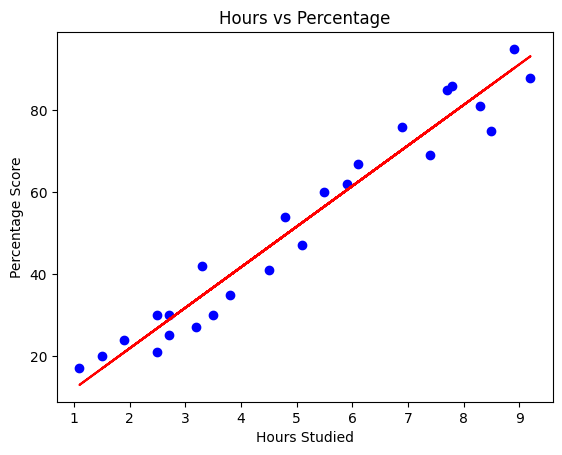

In [7]:
# Plotting the regression line
line = (regressor.coef_ * X) + regressor.intercept_
plt.plot(X, line, color='red');

# Plotting for the complete data
plt.scatter(X, y, color='blue')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.show()

Clearly, the regression line seems to fit our data well.

### **Prediction using the Trained Model**

In [8]:
print(X_test) # Having a look at the test data (in Hours)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
y_pred = regressor.predict(X_test) # Predicting the scores for the test data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # Comparing Actual vs Predicted
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
# Predicting the score for our own value of study time (in Hours)
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Model Diagnostics**

For evaluating the regression model obtained by us we employ some techniques which tell us how well a job it has done of perdicting scores from the number of hours of study.

We start with the Residuals plot of the Regression Model.

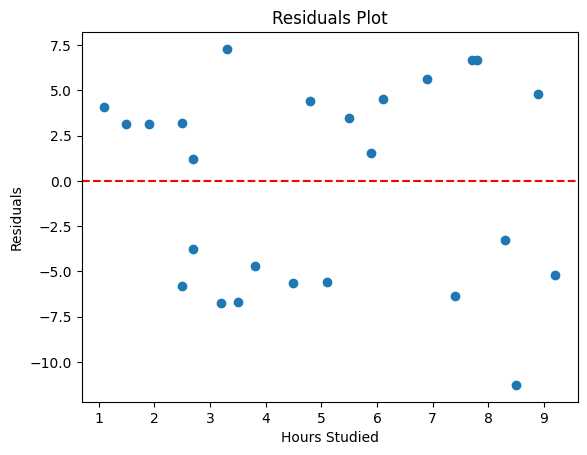

In [11]:
# Predictions (scores) obtained for all values of study time.
pred = regressor.predict(X)

# Residuals: List of differences between actual and predicted values for each data point.
residuals = y - pred

plt.scatter(X, residuals)
plt.title('Residuals Plot')
plt.xlabel('Hours Studied')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Observing the above Residuals plot we note the following: -
1. There are no clusters of data points.
2. Apart from one outlier, no data point deviates beyond a residual magnitude of 7.5 .
3. All the data points are randomly scattered about the zero residual line.
4. The data points have a mostly similar spread for each value of hours of study.

All these observations indicate that a linear regression model is appropriate for this ML problem.



Next, we plot the Q-Q (Quantile-Quantile) Plot for the Residuals of our regression model, which compares the quantiles of the residuals from our model to the quantiles of a normal distribution.

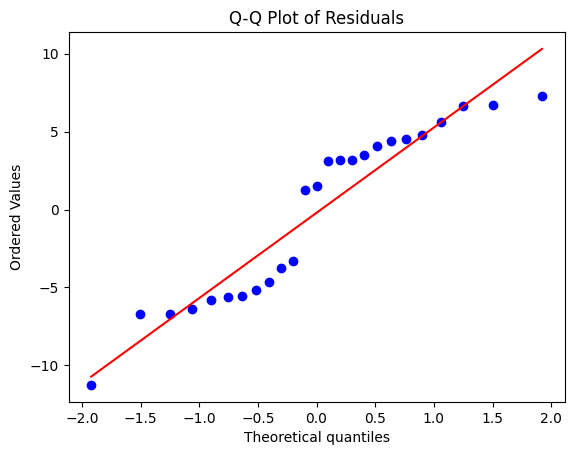

In [12]:
import scipy.stats as stats

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Here we note that the points are close to the 45 degree line suggesting that the residuals are mostly normally distributed. This too indicates that the regression model is well suited for this data.





Finally we carry out a Leave-One-Out Cross-Validation (LOOCV), a robust and reliable method for evaluating the performance of a model, especially when dealing with small datasets like ours (25 data points). Therefore this performs a 25 fold cross validation on our dataset. The mean of the positive value of the 25 scores (negative mean absolute errors) obtained is printed out as the final score.

In [13]:
# Cross-validation (using LOOCV)
loocv = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=len(X))
print(f"LOOCV Mean Score (MAE): {-loocv.mean()}")

LOOCV Mean Score (MAE): 5.412643125237521
